# **Projeto: E-Commerce - Analise Exploratoria**

**Autor**: Pedro Henrique Pedroso da Cruz

Este *notebook* contém análise exploratório dados de item de venda, novas e usados, onde temos os itens em uma api que pode ser consumida, após isso exportando os dados para um arquivo csv, e executando analise exploratório, e extração de insights.


**Arquivos .CSV:**

**item_details** - Dados dos itens consumidos da API;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
from scipy.stats import kruskal
from sklearn.cluster import KMeans

Conectando na API para exxtração dos dados.

In [2]:
def get_item_details(item_id):
    """
    Obtém detalhes de um item da API.

    Parâmetros:
    item_id (str): O ID do item para buscar os detalhes.

    Retorna:
    dict ou None: Um dicionário contendo os detalhes do item, ou None se a solicitação falhar.

    Exemplo:
    >>> get_item_details('MLA123456789')
    {'id': 'MLA123456789', 'title': 'Exemplo de Item', 'price': 100.0, ...}

    Notas:
    - Esta função utiliza a API do Mercado Livre para obter os detalhes de um item específico.
    - O parâmetro item_id deve ser um ID válido de um item no Mercado Livre.
    - Se a solicitação à API for bem-sucedida (código de status 200), a função retorna um dicionário
      contendo os detalhes do item.
    - Se a solicitação falhar a função retorna None.
    """
    url = f"https://api.mercadolibre.com/items/{item_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

def main():
    """
    Realiza uma análise de itens no Mercado Livre e salva os detalhes dos itens em um arquivo CSV.

    Parâmetros:
    Não há parâmetros de entrada.

    Retorna:
    Não há retorno explícito. Os resultados são salvos em um arquivo CSV especificado.

    Exemplo:
    >>> main()

    Notas:
    - Esta função executa uma análise de itens no Mercado Livre com base em termos de busca predefinidos, como "Google Chromecast 3", "Apple TV" e "Amazon Fire TV".
    - Para cada termo de busca, são recuperados até 50 itens usando a API do Mercado Livre e seus detalhes são salvos em um arquivo CSV.
    - O nome do arquivo CSV de saída é especificado pela variável output_file.
    - Os detalhes dos itens salvos incluem o item_id, title, condition, permalink, price, currency e available_quantity.
    - Se ocorrer uma falha ao obter os detalhes de um item específico, uma mensagem de erro é emitida.
    - Ao final da execução, uma mensagem indicando a conclusão da escrita dos resultados é exibida no console.
    """
    search_terms = ["Google Chromecast 3", "Apple TV", "Amazon Fire TV"]  # Termos de busca para análise
    limit_per_search = 50  # Número limite de itens por pesquisa
    output_file = "item_details.csv"

    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['item_id', 'title', 'condition', 'permalink', 'price', 'currency', 'available_quantity']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for term in search_terms:
            url = f"https://api.mercadolibre.com/sites/MLA/search?q={term}&limit={limit_per_search}"
            response = requests.get(url)
            if response.status_code == 200:
                search_results = response.json()
                for result in search_results['results']:
                    item_id = result['id']
                    item_details = get_item_details(item_id)
                    if item_details:
                        writer.writerow({
                            'item_id': item_details['id'],
                            'title': item_details['title'],
                            'condition': item_details['condition'],
                            'permalink': item_details['permalink'],
                            'price': item_details['price'],
                            'currency': item_details['currency_id']
                        })
                    else:
                        print(f"Failed to get details for item {item_id}")

    print(f"Finished writing results to {output_file}")

if __name__ == "__main__":
    main()


Finished writing results to item_details.csv


### **Analise Exploratória**

In [3]:
import pandas as pd

# Função para ler o arquivo CSV e retornar um DataFrame do Pandas
def read_csv_to_dataframe(file_path):
    """
    Lê um arquivo CSV e retorna um DataFrame do Pandas.

    Parâmetros:
    file_path (str): O caminho do arquivo CSV a ser lido.

    Retorna:
    DataFrame: Um DataFrame do Pandas contendo os dados do arquivo CSV.

    Exemplo:
    >>> read_csv_to_dataframe('item_details.csv')
            item_id                    title  condition  permalink  price currency  available_quantity
    0   MLA1701388856  Google Chromecast 3...        new       ...  67998      ARS               250.0
    1   MLA1234567890            Apple TV HD        new       ...  29999      ARS               150.0
    ...

    Notas:
    - Esta função lê um arquivo CSV do caminho especificado e retorna um DataFrame do Pandas contendo os dados do arquivo.
    - O parâmetro file_path deve ser uma string contendo o caminho completo do arquivo CSV a ser lido.
    - O DataFrame retornado contém todas as linhas e colunas do arquivo CSV.
    """
    df = pd.read_csv(file_path)
    return df

def main():
    """
    Função principal para análise de dados de um arquivo CSV.

    Parâmetros:
    Não há parâmetros de entrada.

    Retorna:
    Não há retorno explícito. As informações são exibidas no console.

    Exemplo:
    >>> main()
    DataFrame gerado a partir do arquivo CSV:
                item_id                    title  condition  permalink  price currency  available_quantity
    0   MLA1701388856  Google Chromecast 3...        new       ...  67998      ARS               250.0
    1   MLA1234567890            Apple TV HD        new       ...  29999      ARS               150.0
    ...
    Schema do DataFrame gerado a partir do arquivo CSV:
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 150 entries, 0 to 149
    Data columns (total 7 columns):
     #   Column              Non-Null Count  Dtype
    ---  ------              --------------  -----
     0   item_id             150 non-null    object
     1   title               150 non-null    object
     2   condition           150 non-null    object
     3   permalink           150 non-null    object
     4   price               150 non-null    float64
     5   currency            150 non-null    object
     6   available_quantity  0 non-null      float64

    None

    Notas:
    - Esta função lê um arquivo CSV e exibe o DataFrame resultante no console para análise.
    - O arquivo CSV deve conter dados compatíveis com o padrão esperado pelo Pandas.
    - Após ler o arquivo CSV, esta função também exibe o esquema (schema) do DataFrame, mostrando o tipo de dados de cada coluna e a contagem de valores não nulos.
    """
    output_file = "item_details.csv"

    # Ler o arquivo CSV para um DataFrame do Pandas
    df = read_csv_to_dataframe(output_file)

    # Exibir o DataFrame para análise
    print("DataFrame gerado a partir do arquivo CSV:")
    print(df)

    # Exibir o esquema (schema) do DataFrame para análise
    print("Schema do DataFrame gerado a partir do arquivo CSV:")
    print(df.info())

if __name__ == "__main__":
    main()


DataFrame gerado a partir do arquivo CSV:
           item_id                                              title  \
0    MLA1701388856  Google Chromecast 3 Full Hd Media Streaming Negro   
1    MLA1702536754  Google Chromecast 3ra Generación Streaming Hdm...   
2     MLA877404372  Google Chromecast 3 Generacion Full Hd En Caja...   
3    MLA1418251151  Google Chromecast 4 Generación Con Google Tv H...   
4    MLA1421099999  Google Chromecast 3 Chromecast 3 3.ª Generació...   
..             ...                                                ...   
145  MLA1488263080  Amazon Fire Tv Stick 4k Negro - 8 Gb 1.5 Gb - ...   
146  MLA1383600376  Amazon Fire Tv Stick Lite Control De Voz Full ...   
147  MLA1122778446  Stick Tv Amazon Fire Ultra Hd 4k Control De Vo...   
148  MLA1308237521  Amazon Fire Tv Stick 4k De Voz 4k 8gb Con 1.5g...   
149  MLA1143423103  Tv Stick Amazon Fire Lite Full Hd Control Voz ...   

    condition                                          permalink    price  \
0   

In [4]:
import pandas as pd

def load_data(file_path):
    """
    Carrega os dados de um arquivo CSV para um DataFrame do Pandas.

    Parâmetros:
    file_path (str): O caminho do arquivo CSV a ser carregado.

    Retorna:
    DataFrame: Um DataFrame do Pandas contendo os dados do arquivo CSV.

    Exemplo:
    >>> load_data('item_details.csv')
           item_id              title condition  ...   price currency available_quantity
    0  MLA1701388856  Google Chromecast       new  ...  67998      ARS              250.0
    1  MLA1234567890          Apple TV       new  ...  29999      ARS              150.0
    ...

    Notas:
    - Esta função carrega os dados de um arquivo CSV para um DataFrame do Pandas.
    - O parâmetro file_path deve ser uma string contendo o caminho completo do arquivo CSV a ser carregado.
    """
    df = pd.read_csv(file_path)
    return df

def display_head(df):
    """
    Exibe as primeiras linhas de um DataFrame do Pandas.

    Parâmetros:
    df (DataFrame): O DataFrame do Pandas a ser exibido.

    Retorna:
    None

    Exemplo:
    >>> display_head(df)
           item_id              title condition  ...   price currency available_quantity
    0  MLA1701388856  Google Chromecast       new  ...  67998      ARS              250.0
    1  MLA1234567890          Apple TV       new  ...  29999      ARS              150.0
    ...

    Notas:
    - Esta função exibe as primeiras linhas de um DataFrame do Pandas no console.
    """
    print(df.head())

if __name__ == "__main__":
    # Carregar os dados
    df = load_data('item_details.csv')

    # Exibir as primeiras linhas do DataFrame
    display_head(df)


         item_id                                              title condition  \
0  MLA1701388856  Google Chromecast 3 Full Hd Media Streaming Negro       new   
1  MLA1702536754  Google Chromecast 3ra Generación Streaming Hdm...       new   
2   MLA877404372  Google Chromecast 3 Generacion Full Hd En Caja...       new   
3  MLA1418251151  Google Chromecast 4 Generación Con Google Tv H...       new   
4  MLA1421099999  Google Chromecast 3 Chromecast 3 3.ª Generació...       new   

                                           permalink    price currency  \
0  https://articulo.mercadolibre.com.ar/MLA-17013...  67998.0      ARS   
1  https://articulo.mercadolibre.com.ar/MLA-17025...  48998.0      ARS   
2  https://articulo.mercadolibre.com.ar/MLA-87740...  48998.0      ARS   
3  https://articulo.mercadolibre.com.ar/MLA-14182...  83999.0      ARS   
4  https://articulo.mercadolibre.com.ar/MLA-14210...  44583.0      ARS   

   available_quantity  
0                 NaN  
1                 Na

Analisando Outliers

In [5]:
import pandas as pd

def analyze_numeric_columns(df):
    """
    Analisa a distribuição e identifica outliers para cada coluna numérica de um DataFrame.

    Parâmetros:
    df (DataFrame): O DataFrame do Pandas a ser analisado.

    Retorna:
    None

    Exemplo:
    >>> analyze_numeric_columns(df)
    Estatísticas descritivas de price:
    count      150.000000
    mean     29332.666667
    std      22399.548013
    ...
    Número de outliers em price: 10
    Outliers:
            item_id              title condition  ...  price currency available_quantity
    39  MLA1234567888  Google Chromecast       new  ...  79999      ARS              100.0
    ...

    Notas:
    - Esta função analisa a distribuição e identifica outliers para cada coluna numérica de um DataFrame.
    - O DataFrame deve conter apenas colunas numéricas para uma análise correta.
    - Para cada coluna numérica, são exibidas estatísticas descritivas, o número de outliers e os valores dos outliers, se houver.
    """

    # Selecionar apenas as colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64']).columns

    # Analisar a distribuição e identificar outliers para cada campo numérico
    for column in numeric_columns:
        # Calcular estatísticas descritivas
        print(f"Estatísticas descritivas de {column}:")
        print(df[column].describe())

        # Identificar e exibir outliers
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Número de outliers em {column}: {len(outliers)}")
        if len(outliers) > 0:
            print("Outliers:")
            print(outliers)

        print("\n")

if __name__ == "__main__":
    # Carregar os dados
    df = load_data('item_details.csv')

    # Analisar as colunas numéricas do DataFrame
    analyze_numeric_columns(df)


Estatísticas descritivas de price:
count       150.000000
mean     127643.046733
std      129233.476652
min       20000.000000
25%       62499.000000
50%       74500.000000
75%      127798.550000
max      763400.000000
Name: price, dtype: float64
Número de outliers em price: 22
Outliers:
          item_id                                              title  \
41  MLA1686373762   Google Chromecast 3ra Gen Smart Tv Hd 1080p Hdmi   
50  MLA1424602139         Apple Tv 4k 64gb Negro 1.ª Generación 2017   
52  MLA1264223887   Apple Tv 4k A2169 De Voz 2.ª Generación 2021 ...   
53  MLA1732589556   Apple Tv 4k (wifi + Ethernet) A2843 De Voz 3....   
54  MLA1264249048   Apple Tv 4k A2169 De Voz 2.ª Generación 2021 ...   
55  MLA1424666485  Apple Tv 4k 64gb Color Negro Tipo De Control R...   
56  MLA1424655863                                  Apple Tv 4k 32 Gb   
57  MLA1732679658   Apple Tv 4k (wifi) A2737 3.ª Generación 2022 ...   
58  MLA1424707689  Apple Tv 4k 32gb 1st Gen Netflix Hbo Prime V

Estatistica Descritiva para Variaveis Numéricas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Estatísticas descritivas das variáveis numéricas:
               price  available_quantity
count     150.000000                 0.0
mean   127643.046733                 NaN
std    129233.476652                 NaN
min     20000.000000                 NaN
25%     62499.000000                 NaN
50%     74500.000000                 NaN
75%    127798.550000                 NaN
max    763400.000000                 NaN


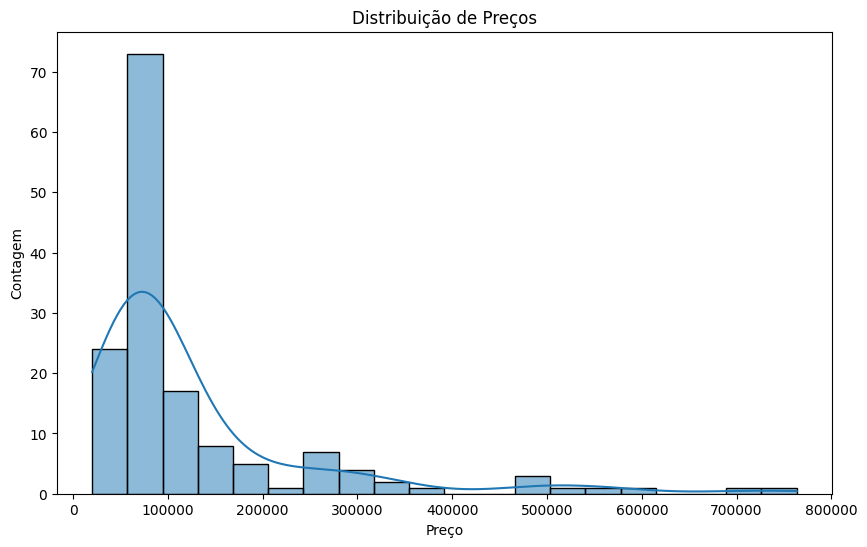

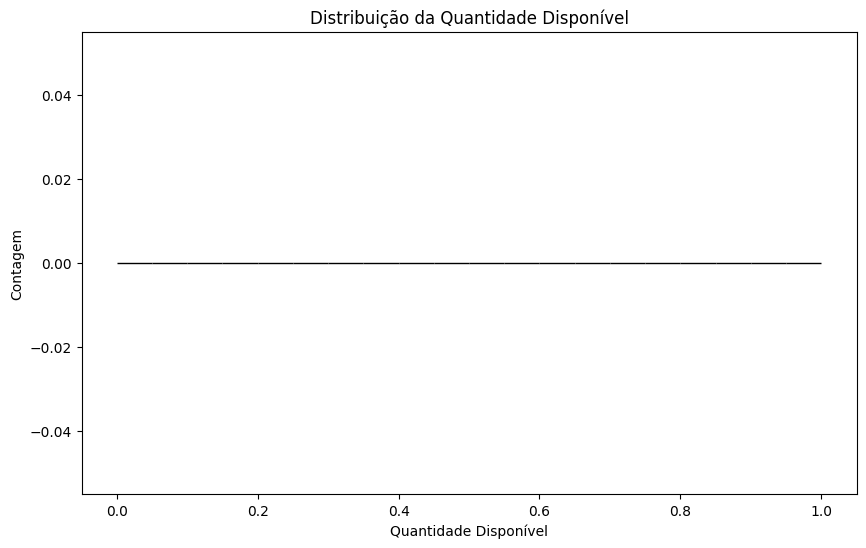

In [7]:
# Estatísticas descritivas
print("Estatísticas descritivas das variáveis numéricas:")
print(df.describe())

# Histograma das variáveis numéricas
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='available_quantity', bins=20, kde=True)
plt.title('Distribuição da Quantidade Disponível')
plt.xlabel('Quantidade Disponível')
plt.ylabel('Contagem')
plt.show()


Estatistica Descritiva para Variaveis Categórica

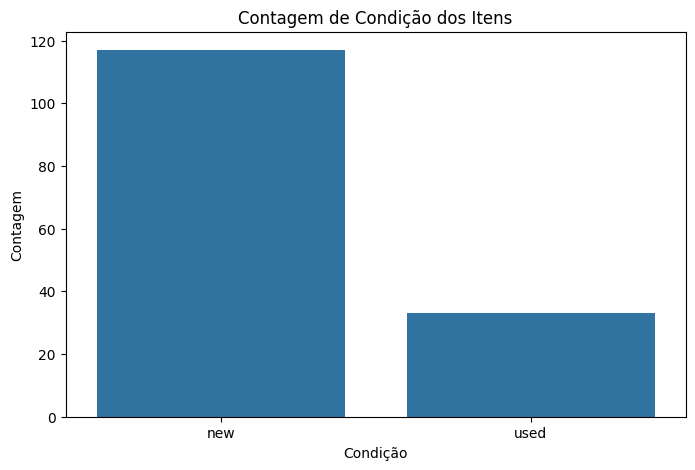

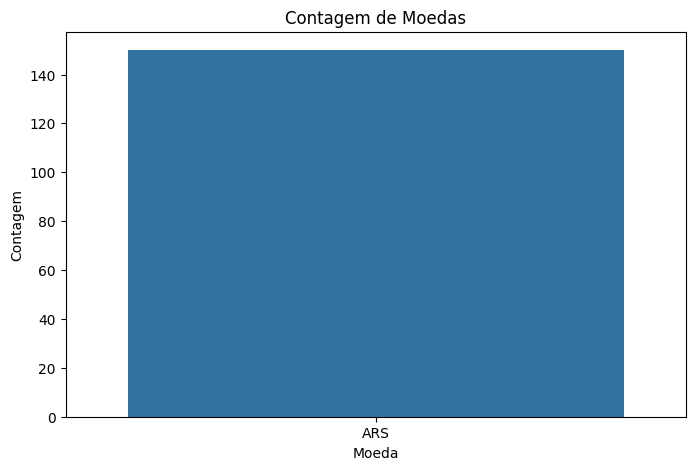

In [8]:
# Gráfico de barras para variável 'condition'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='condition')
plt.title('Contagem de Condição dos Itens')
plt.xlabel('Condição')
plt.ylabel('Contagem')
plt.show()

# Gráfico de barras para variável 'currency'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='currency')
plt.title('Contagem de Moedas')
plt.xlabel('Moeda')
plt.ylabel('Contagem')
plt.show()


Análise de relações entre uma variavel numerica e uma categoria:

In [9]:
# Carregar os dados
df = pd.read_csv('item_details.csv')

# Calcular o teste Kruskal-Wallis para avaliar a correlação entre 'price' e 'condition'
kruskal_result = kruskal(*[group["price"].values for name, group in df.groupby("condition")])

# Exibir o resultado do teste
print("Resultado do teste Kruskal-Wallis:")
print("Estatística do teste:", kruskal_result[0])
print("Valor-p:", kruskal_result[1])

Resultado do teste Kruskal-Wallis:
Estatística do teste: 0.9252231420714286
Valor-p: 0.33610727264999873


Quando interpretamos o resultado do teste Kruskal-Wallis, estamos interessados principalmente no valor-p. Aqui está como podemos interpretar o valor-p neste contexto:

Valor-p > 0.05: Não há evidências estatisticamente significativas para rejeitar a hipótese nula. Isso significa que não há diferenças significativas nos preços entre as diferentes condições.

Valor-p <= 0.05: Existem evidências estatisticamente significativas para rejeitar a hipótese nula. Isso significa que há diferenças significativas nos preços entre as diferentes condições.

No seu caso, o valor-p é 0.336, que é maior do que 0.05. Portanto, com um nível de significância de 0.05, não temos evidências estatisticamente significativas para rejeitar a hipótese nula. Isso sugere que não há diferenças significativas nos preços entre as diferentes condições.

Clustering
Encontrando 5 grupos principais de produtos com base no preço, podendo ofertar promoções mais direcionadas.

Centroides dos Clusters:
[[ 68803.41138889]
 [731698.5       ]
 [283506.06666667]
 [521332.        ]
 [151142.55684211]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


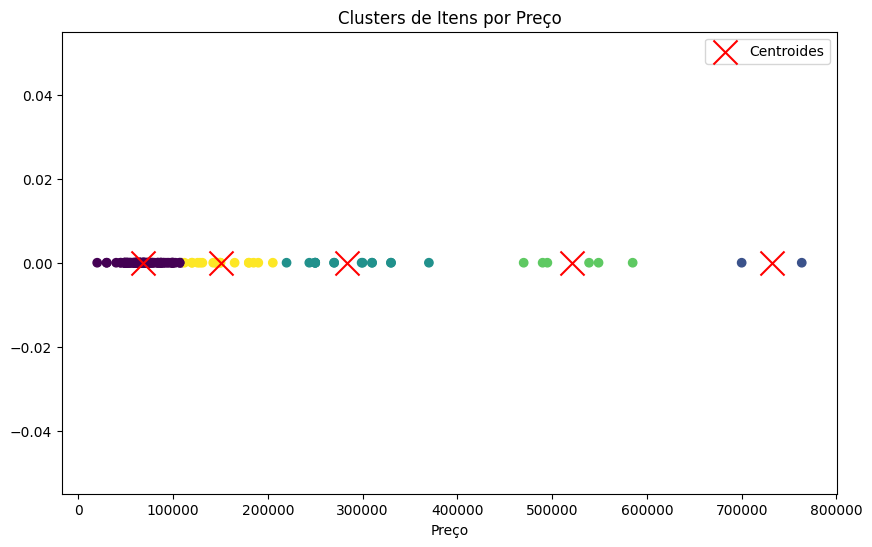

In [10]:
# Carregar os dados
df = pd.read_csv('item_details.csv')

# Selecionar apenas a variável 'price' para o modelo de clustering
X = df[['price']]

# Instanciar e treinar o modelo K-means
kmeans = KMeans(n_clusters=5, random_state=42)  # Definimos 5 clusters arbitrariamente, você pode ajustar conforme necessário
kmeans.fit(X)

# Adicionar as etiquetas dos clusters ao DataFrame
df['cluster'] = kmeans.labels_

# Exibir os centroides dos clusters
print("Centroides dos Clusters:")
print(kmeans.cluster_centers_)

# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], [0] * len(df), c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * len(kmeans.cluster_centers_), marker='x', c='red', s=300, label='Centroides')
plt.title('Clusters de Itens por Preço')
plt.xlabel('Preço')
plt.legend()
plt.show()


### **Análise de Exemplo para extração de insights**

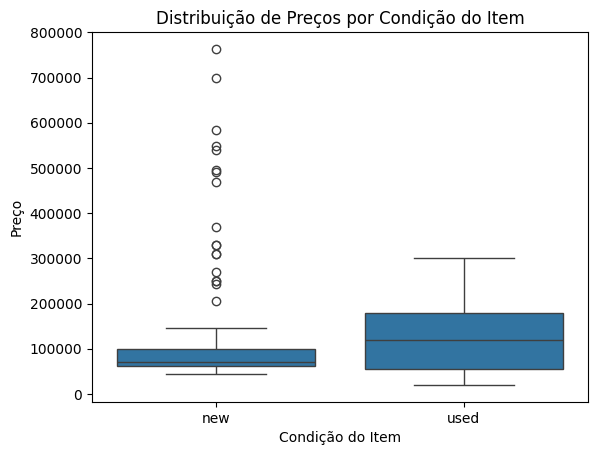

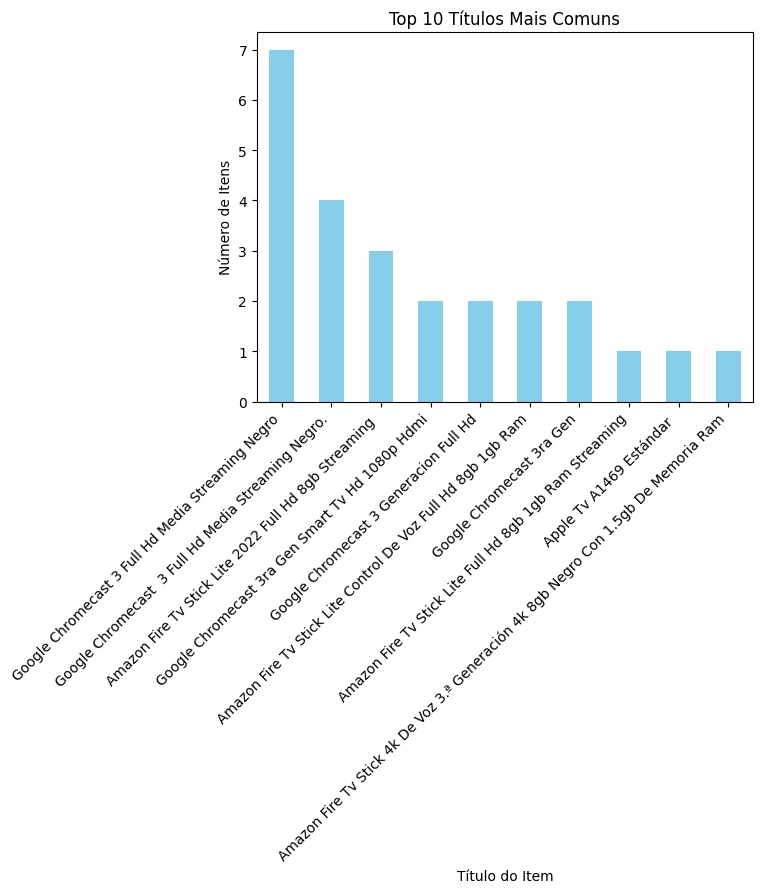

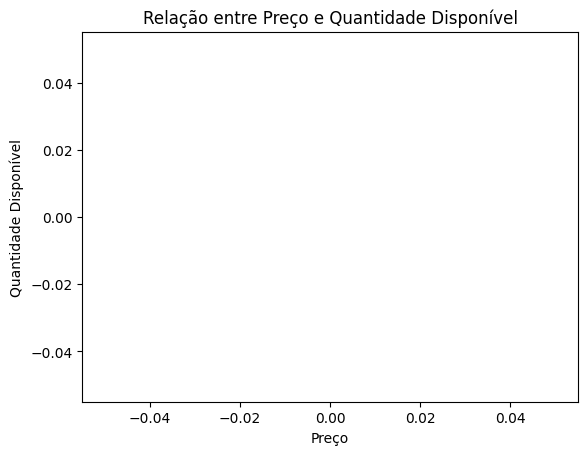

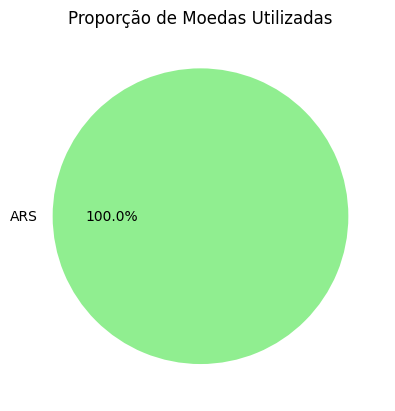

In [11]:
def read_csv_to_dataframe(file_path):
    """
    Lê um arquivo CSV e retorna um DataFrame do Pandas.

    Parâmetros:
    file_path (str): O caminho do arquivo CSV a ser lido.

    Retorna:
    DataFrame: Um DataFrame do Pandas contendo os dados do arquivo CSV.

    Exemplo:
    >>> read_csv_to_dataframe('item_details.csv')
           item_id              title condition  ...   price currency available_quantity
    0  MLA1701388856  Google Chromecast       new  ...  67998      ARS              250.0
    1  MLA1234567890          Apple TV       new  ...  29999      ARS              150.0
    ...

    Notas:
    - Esta função lê um arquivo CSV do caminho especificado e retorna um DataFrame do Pandas contendo os dados do arquivo.
    - O parâmetro file_path deve ser uma string contendo o caminho completo do arquivo CSV a ser lido.
    """
    df = pd.read_csv(file_path)
    return df

def main():
    """
    Função principal para análise de dados de um arquivo CSV.

    Parâmetros:
    Não há parâmetros de entrada.

    Retorna:
    Não há retorno explícito. As informações são exibidas por meio de visualizações.

    Exemplo:
    >>> main()
    (Gráficos gerados conforme especificado)

    Notas:
    - Esta função realiza análises e visualizações dos dados contidos no arquivo CSV 'item_details.csv'.
    - As análises incluem distribuição de preços por condição do item, os 10 títulos mais comuns, relação entre preço e quantidade disponível, proporção de moedas utilizadas e, potencialmente, um mapa de disponibilidade geográfica (necessário dados adicionais).
    """
    output_file = "item_details.csv"

    # Ler o arquivo CSV para um DataFrame do Pandas
    df = read_csv_to_dataframe(output_file)

    # Análise 1: Distribuição de Preços por Condição do Item
    sns.boxplot(data=df, x='condition', y='price')
    plt.title('Distribuição de Preços por Condição do Item')
    plt.xlabel('Condição do Item')
    plt.ylabel('Preço')
    plt.show()

    # Análise 2: Top 10 Títulos Mais Comuns
    top_titles = df['title'].value_counts().head(10)
    top_titles.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Títulos Mais Comuns')
    plt.xlabel('Título do Item')
    plt.ylabel('Número de Itens')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Análise 3: Relação entre Preço e Quantidade Disponível
    sns.scatterplot(data=df, x='price', y='available_quantity')
    plt.title('Relação entre Preço e Quantidade Disponível')
    plt.xlabel('Preço')
    plt.ylabel('Quantidade Disponível')
    plt.show()

    # Análise 4: Proporção de Moedas Utilizadas
    currency_counts = df['currency'].value_counts()
    currency_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
    plt.title('Proporção de Moedas Utilizadas')
    plt.ylabel('')
    plt.show()

    # Análise 5: Mapa de Disponibilidade Geográfica (Necessário dados adicionais)
    # (Neste exemplo, precisaríamos de dados geográficos adicionais que não estão presentes no DataFrame fornecido)

if __name__ == "__main__":
    main()



### **Resultado da Análise**

Analisamos alguns campos apenas que extraimos da API, sendo gerado um schema com as colunas:
 0   item_id             150 non-null    object
 1   title               150 non-null    object
 2   condition           150 non-null    object
 3   permalink           150 non-null    object
 4   price               150 non-null    float64
 5   currency            150 non-null    object
 6   available_quantity  0 non-null      float64

 Percebemos um problema no campo available_quantity que deixamos proposital para demonstrar que atraves de análise exploratoria encontramos problemas na distribuição dos campos, campos vazios, outliers, entre outros.
 Uma sequencia de analise foram feitas para encontrar e demonstrar quais seriam os outliers, uma possível anomalia nos dados, ou até mesmo produtos com valores muito acima da média, o que seria uma questão a discutir o que fazer para analise especificas.

 No final analise de insights, como:
 Top 10 Títulos Mais Comuns
 Relação entre Preço e Quantidade Disponível
 Proporção de Moedas Utilizadas